# Demonstration to Show Interactive Data Analytics in Jupyter

<b>Author: </b>Rich Lysakowski

<b>Date:</b>   7/11/2019

This demonstration shows how to take an analytic function (a Normal distribution), create a similarly shaped distribution, and then add some random noise and offsets to it to create a potentially very noisy dataset, which is then curvefit using the SciPy Optimize Package.  

The final curvefit parameters are found by Scifit, and then a table and a comparison chart are produced for the results.

The main point of this demonstration is to show how to use some simple Widgets from the Jupyter Widgets Package in the statistical mmodeling example.   

## Verify WHERE this demo is running.  

In [1]:
import sys; sys.executable

'C:\\Anaconda3\\python.exe'

# Simple interactive widget demo

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

from scipy.optimize import curve_fit as cf

### Define Variables

In [3]:
N_samples = 500
x = np.linspace(-5, 5, N_samples)

In [4]:
npoints = 50
print(f"Show the first {npoints} data points: \n\n {x[0:npoints]}.")

Show the first 50 data points: 

 [-5.         -4.97995992 -4.95991984 -4.93987976 -4.91983968 -4.8997996
 -4.87975952 -4.85971944 -4.83967936 -4.81963928 -4.7995992  -4.77955912
 -4.75951904 -4.73947896 -4.71943888 -4.6993988  -4.67935872 -4.65931864
 -4.63927856 -4.61923848 -4.5991984  -4.57915832 -4.55911824 -4.53907816
 -4.51903808 -4.498998   -4.47895792 -4.45891784 -4.43887776 -4.41883768
 -4.3987976  -4.37875752 -4.35871743 -4.33867735 -4.31863727 -4.29859719
 -4.27855711 -4.25851703 -4.23847695 -4.21843687 -4.19839679 -4.17835671
 -4.15831663 -4.13827655 -4.11823647 -4.09819639 -4.07815631 -4.05811623
 -4.03807615 -4.01803607].


### Define Function (ideal analytical fitting function and actual data generating function with noise)

In [5]:
def f(x, a, mu,sigma):
    r = a * np.exp(-(x-mu)**2 / (2*sigma**2))
    return (r)

## Define the Analytical Function and Noisy Test Data Function 

***Try Interactive Widgets to input data values.***

In [6]:
# Pre-Defined Variables
amplitude = 3
ideal_mu = 0.0
ideal_sigma = 0.8
noise_sd = 0.6
noise_mean = 0.1 

**Figure out WHY default values cannot be set directly in the argument list below**

In [7]:
def func(amplitude=amplitude, ideal_mu=ideal_mu, ideal_sigma=ideal_sigma, noise_sd=noise_sd, noise_mean=noise_mean):
    r = amplitude * (np.exp(-(x-ideal_mu)**2) / (2*ideal_sigma**2))
    
    # Set the Figure Size
    plt.figure(figsize=(8,5))
    
    # Create 
    plt.plot(x, r, c='k', lw=3)
    plt.ylim=5
    #plt.xlim=5
    r = r + np.random.normal(loc=noise_mean, scale=noise_sd, size=N_samples)

    plt.scatter(x, r, edgecolors='k', c='yellow', s=60)
    plt.grid(True)
    plt.show()
    return (r)

### Call the 'interactive' widget with the data generating function, which also plots the data real-time
** Play with the *'noise_sd'* and *'noise_mean'* parameters to see how they impact the estimation (curve-fit) accuracy **

In [8]:
y=interactive(func, amplitude=[1,2,3,4,5], ideal_mu=(-5,5,0.5),
              ideal_sigma=(0,2,0.2),
              noise_sd=(0, 1, 0.1), noise_mean=(-1,1,0.1))
display(y)

interactive(children=(Dropdown(description='amplitude', index=2, options=(1, 2, 3, 4, 5), value=3), FloatSlide…

### Run curve-fitting optimizer to estimate parameters, store, and plot

In [14]:
# Curve-fit optimizer
p = y.result

In [15]:
p1, _ = cf(f, xdata=x, ydata=p)
print(f"Values are p1 = {p1} \n and  _ = \n\n  {_}")

Values are p1 = [ 4.10626856 -1.01657726  0.75593935] 
 and  _ = 

  [[ 1.24683023e-02  3.08290979e-11 -1.53033561e-03]
 [ 3.08290979e-11  5.63491411e-04 -5.79260715e-12]
 [-1.53033561e-03 -5.79260715e-12  5.63491415e-04]]


In [16]:
amplitude

3

In [17]:
par_lst = list(p1)

# Gather ideal parameters from the interactive widget object
p2 = list(y.kwargs.values())
p3 = p2[0:3]

# Make the data matrix
data = np.array([p3,par_lst])

# Put it in a Data Frame
df = pd.DataFrame(data=data.T, index=['Amplitude','Mean','Std.Dev'], columns=['Original Params','Estimated Params'])
df

,Original Params,Estimated Params
Amplitude,5.0,4.106269
Mean,-1.0,-1.016577
Std.Dev,0.8,0.755939


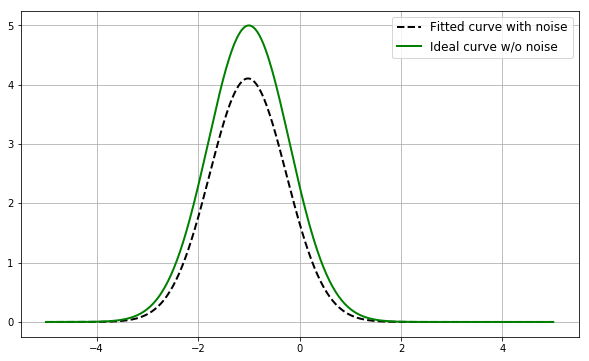

In [18]:
# Plot the ideal and estimated curves
plt.figure(figsize=(10,6))
plt.plot(x,f(x,par_lst[0],par_lst[1],par_lst[2]),'k--',lw=2)
plt.plot(x,f(x,p3[0],p3[1],p3[2]),c='green',lw=2)
plt.legend(['Fitted curve with noise','Ideal curve w/o noise'],fontsize=12)
plt.grid(True)
plt.show()